# Ordinary Least Squares

Ordinary least squares represents one of the simplest forms of regression problems, but is however a useful tool if the numerical features of the data (dependent variables) is without noise. Ordinary Least Squares generally assumes that the labels of said data (which are independent variables) are noisy in nature. We then predict weights upon the fetaures, using saif features and labels, and then check to see the error betwen the predicted labels and our labels.

In [18]:
import numpy as np
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [19]:
#this method is an ordinary least square solvers, good for datasets with uniform data, no need for reguralization
def OLS(A,b):
    #solving the equation Ax=b
    if (matrix_rank(np.matmul(A.T,A)) != A.shape[1]):
        print("Matrix times its tranpoise is not full rank")
    lhs= np.matmul(A.T,A)
    rhs= np.matmul(A.T,b)
    x=np.matmul(np.linalg.inv(lhs),rhs)
    return x

In [26]:
x, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

We will now create an error function that will help us calculate the error between our predicted labels, and the true labels

# Note on Mean sqared error (MSE)
The MSE is a measure of the quality of an estimator. It calculates the mean squared difference across two quantities. The mean squared error is never negative, and the closer to zero, the better the estimate 

In [27]:
def MSE(y_true,y_predicted):
    return (1/len(y_true))*np.sum((np.subtract(y_true,y_predicted))**2)

To begin with, let's visualize our data, I purposely picked a noisy set of labels, to show the difference in OLS with noise in the labels

Text(0.5,1,'Plotting the data')

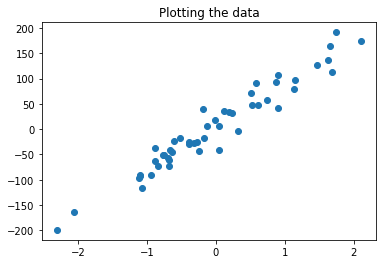

In [28]:
plt.scatter(x,y)
plt.title("Plotting the data")

Text(0.5,1,'Comparision of estimation using OLS, and true data')

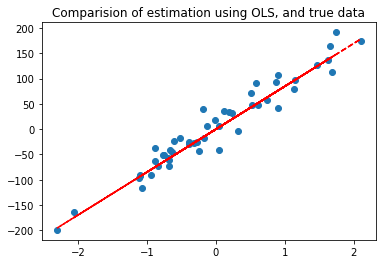

In [29]:
weights_predicted= OLS(x,y)
y_predicted= np.matmul(x,weights_predicted)
error= MSE(y,y_predicted)
plt.scatter(x,y)
plt.plot(x,y_predicted,linestyle='dashed',c='red')
plt.title("Comparision of estimation using OLS, and true data")

In [30]:
print("The mean squared error of the predicted labels using OLS is " + str(error))

The mean squared error of the predicted labels using OLS is 444.48185006939656
